In [1681]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1682]:

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time

os.chdir('/home/ali/packages/s2p-lbm/')
from scipy import stats
from suite3d import plot_utils as plot

from importlib import reload
from pathlib import Path

from suite3d.job import Job

In [6]:
fig_dir = Path('/mnt/md0/s3d-figures')
figname = 'fig-tinya'
fdir = fig_dir / figname
plt.rcParams['svg.fonttype'] = 'none'
os.makedirs(fdir, exist_ok=True)

In [57]:
job = Job(r'/mnt/md0/runs','tinya-fig', create=False)

   Found and loaded params from /mnt/md0/runs/s3d-tinya-fig/params.npy


In [ ]:
reg = job.load_registration_results()
regs = n.concatenate(reg['int_shift'],axis=0)
suite2p_dirs = [Path(os.path.join('/mnt/zenneth-subjects/TC030/2025-02-24/pixease/3-4-5/suite2p', f'plane{i}')) for i in range(9)]
ops = n.load(suite2p_dirs[4] / 'ops.npy',allow_pickle=True).item()

In [532]:
all_spks = []
stats2p = []
img2p = []
coords2p = []
lams2p = []
for dir in range(1,9):
    ops = n.load(suite2p_dirs[dir] / 'ops.npy', allow_pickle=True).item()
    plane_spks = n.load(os.path.join(suite2p_dirs[dir],'spks.npy'))
    plane_iscell = n.load(os.path.join(suite2p_dirs[dir], 'iscell.npy'))
    all_spks.append(plane_spks[plane_iscell[:,0].astype(bool)])
    plane_stats = n.load(os.path.join(suite2p_dirs[dir], 'stat.npy'), allow_pickle=True)
    plane_stats = [p for i,p in enumerate(plane_stats) if True ] #plane_iscell[i,0]]
    stats2p += plane_stats
    coords2p += [(n.ones(len(s['ypix']), dtype=int)*dir-1, s['ypix'],s['xpix']) for s in plane_stats]
    lams2p += [s['lam'] for s in plane_stats]
    img2p.append(ops['meanImg'])
nt = n.min([s.shape[1] for s in all_spks])
all_spks = [s[:,:nt] for s in all_spks]
spks2p = n.concatenate(all_spks,axis=0)
img2p = n.array(img2p)

In [533]:
# Create the job
job = Job(r'/mnt/md0/runs','tinya-fig', create=False)
summary =  job.load_summary()
corr_map_results = job.load_corr_map_results()
corr_map = corr_map_results['vmap']
img3d = summary['ref_img_3d']

   Found and loaded params from /mnt/md0/runs/s3d-tinya-fig/params.npy


In [1534]:
# seg = job.load_segmentation_results(output_dir_name='rois2-rois')
seg = job.load_segmentation_results(output_dir_name='rois')
stats3d = [s for i,s in enumerate(seg['stats']) if True ]# seg['iscell'][i,0]]

# spks3d = n.load(os.path.join(job.dirs['rois2'], 'spks.npy'))
# lams3d = [s['lam'] for s in stats3d]

      Loading from /mnt/md0/runs/s3d-tinya-fig/rois/info.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois/stats.npy
      Loading from /mnt/md0/runs/s3d-tinya-fig/rois/iscell.npy


In [1535]:
lam_max_2p = n.percentile(n.concatenate(lams2p), 100) * 0.15
lam_max_3d = n.percentile(n.concatenate(lams3d), 100) * 0.15

In [1536]:
import colorcet

In [1537]:
__, rgbvol_2p = ui.make_label_vols(None, img2p.shape, coords=coords2p, lams=lams2p, lam_max =lam_max_2p, lam_min=0, cmap='cet_glasbey_dark')
__, rgbvol_3d = ui.make_label_vols(stats3d, img3d.shape, lam_max=lam_max_3d, lam_min=0, cmap='cet_glasbey_dark')

In [1538]:
# tif = '/mnt/zenneth-subjects/TC030/2025-02-24/3/2025-02-24_3_TC030_2P_00001_00001.tif'

# import tifffile

# raw_tif = tifffile.imread(tif)

# red = raw_tif[:1800, 1].reshape(9,200,512, 512)[1:].mean(axis=1)
# green = raw_tif[:1800, 0].reshape(9,200,512, 512)[1:].mean(axis=1)

In [1539]:
crop2p = 250, 450, 25, 225
# crop2p = None, None, None, None

In [1540]:
green.shape

(8, 512, 512)

In [1541]:
from skimage.feature import blob_dog, blob_log

In [1542]:
red_filt = red.copy()
red_filt[red < 500] = 0
red_filt /= n.percentile(red_filt, 99, axis=(1,2), keepdims=True)

In [1543]:
red_cell_centers = []

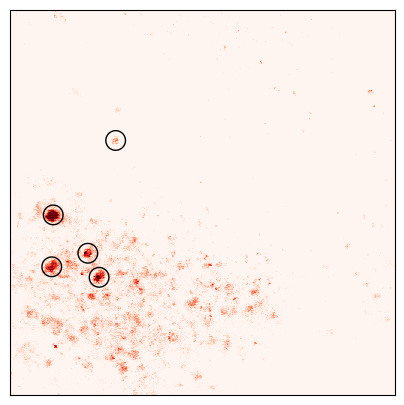

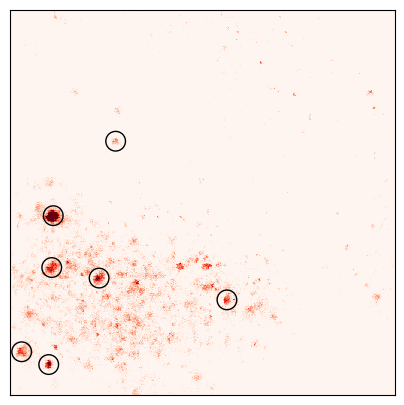

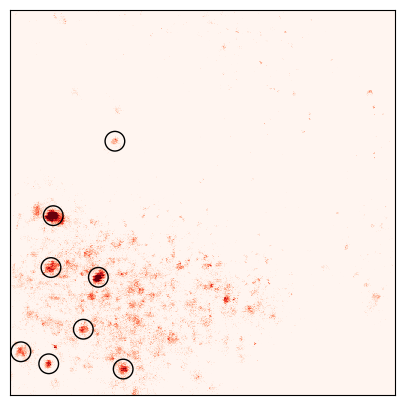

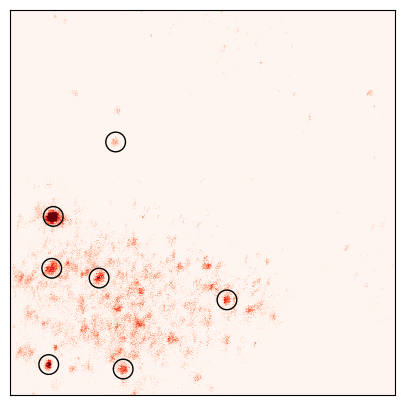

In [1544]:
red_centers = []
# plane_idx = 1
for plane_idx in (3,4,5,6):
    blobs = blob_dog(red_filt[plane_idx], min_sigma = 5, max_sigma = 50, threshold = 0.25)
    
    bys, bxs = blobs[:,:2].T
    for by,bx in zip(bys,bxs):
        red_centers.append((plane_idx, int(by), int(bx)))
    scale = 5
    f,ax = plt.subplots(figsize=(scale,scale))
    plot.show_img(red_filt[plane_idx], cmap='Reds', vminmax=(0.6,2), ax=ax)
    ax.scatter(bxs, bys, color='none', s=200, edgecolor='k')

In [1646]:
red_centers_best = n.array( [
    (2,272,57, 0),
    (3,272,57, 0),
    (4,273, 57, 0),
    (5,273, 57, 0),
    (6,274,57, 0),
    
    # # (3,471,51, 5),
    # (4,471, 51, 5),
    # (5,471, 51, 5),
    # (6,471,51, 5),

    (2,355, 118, 1),
    (3,355, 118, 1),
    (4,356,118, 1),
    (5, 355,117, 1),
    (6, 356, 118, 1),

    # (3, 360, 168, 4),
    # (4, 360, 168, 4),
    # (5, 360, 168, 4),
    
    (2, 341,55,2),
    (3, 341,55,2),
    (4,342,55,2),
    # (5,342, 54,2),
    # (6,343,55,2),

    
    # (4,340,227,6),
    # (5,340, 227,6),
    # (6,340,227,6),
    
    # (3,340,226,8),
    # (4,340,226,8),
    # (5,340,226,8),
    # (6,340,226,8),

    (2,173,140,7),
    (3,173,140,7),
    (4,173,140,7),
    (5,173,140,7),
    (6,173,140,7),
    
    # (6,477,150, 3),
    # (5,477, 150, 3),
                           ]   )

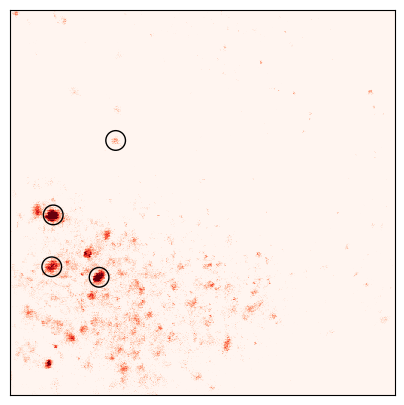

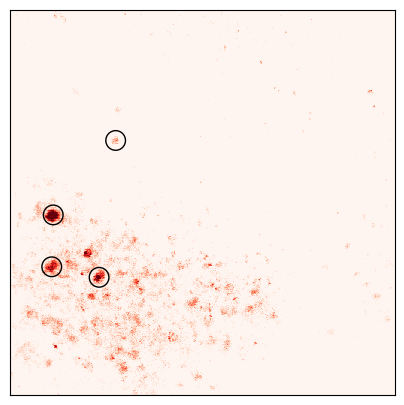

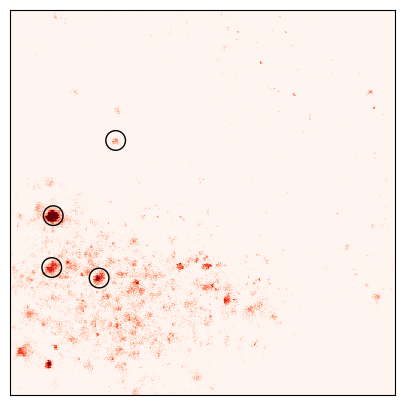

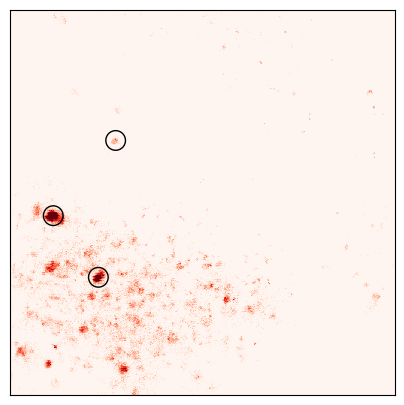

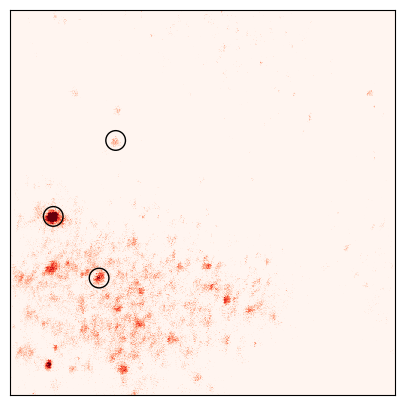

In [1647]:
for plane_idx in (2,3,4,5,6):

    f,ax = plt.subplots(figsize=(scale,scale))
    plot.show_img(red_filt[plane_idx], cmap='Reds', vminmax=(0.6,2), ax=ax)
    # ax.scatter(bxs, bys, color='none', s=200, edgecolor='k')
    centers = red_centers_best[:,0] == plane_idx
    ax.scatter(red_centers_best[centers][:,2],red_centers_best[centers][:,1],  color='none', s=200, edgecolor='k')

In [1648]:
coords3d = [s['coords'] for s in stats3d]

In [1649]:
coords2p_tuple = [ [tuple(c) for c in n.array(coord).T] for coord in coords2p]

In [1650]:
coords3d_tuple = [ [tuple(c) for c in n.array(coord).T] for coord in coords3d]

In [1651]:
meds2p = [s['med'] for s in stats2p]

In [1652]:
center

(6, 173, 140)

In [1653]:
roi_per_center_2p = []
for center in red_centers_best:
    center = tuple(center[:3])
    matching_rois = []
    matching_roi_lens = []
    for roi_idx, coord in enumerate(coords2p_tuple):        
        # dist_to_center = n.linalg.norm(n.array(coord) - center,axis=1)
        
        if center in coord:# or min(dist_to_center) < 5:
            # print("match")
            # print(meds2p[roi_idx])
            # print(center[1:])
            matching_rois.append(roi_idx)
            matching_roi_lens.append(len(coord))
            
    if len(matching_rois) == 0:
        # print("No rois")
        roi_per_center_2p.append(None)
    else:
        # print(len(matching_rois))
        roi_per_center_2p.append(matching_rois[n.argmax(matching_roi_lens)])

In [1654]:
roi_per_center_idx_2p = n.array([r for r in roi_per_center_2p if r is not None], dtype=int)

In [1655]:
meds3d = [s['med'] for s in stats3d]

In [1656]:
roi_per_center_3d = []
for center in red_centers_best:
    center = tuple(center[:3])
    matching_rois = []
    matching_roi_lens = []
    for roi_idx, coord in enumerate(coords3d_tuple):
        # dist_to_center = n.linalg.norm(n.array(coord) - center,axis=1)
        
        if center in coord:

            matching_rois.append(roi_idx)
            matching_roi_lens.append(len(coord))
            
    if len(matching_rois) == 0:
        # print("No rois")
        roi_per_center.append(None)
    else:
        # print(len(matching_rois))
        roi_per_center_3d.append(matching_rois[n.argmax(matching_roi_lens)])
        roi_idx = matching_rois[n.argmax(matching_roi_lens)]
        # print(matching_rois[roi_idx])           
        # print("match", roi_idx)
        # print(meds3d[roi_idx])
        # print(center)

In [1657]:
import colorcet

In [1685]:
from suite3d import ui

In [1686]:
roi_per_center_idx_3d = n.array([r for r in n.unique(roi_per_center_3d) if r is not None], dtype=int)

# roi_per_center_idx_3d = n.array([ 17,  22, 149, 82, 263, 484])
roi_per_center_idx_3d = n.array([ 17,  22, 82, 263, 484])
iscell_redcell_3d = n.zeros(len(stats3d), dtype=bool)
iscell_redcell_3d[roi_per_center_idx_3d] = True
max_mult = 0.35
max_mult_2p = 0.1
lam_min = 0.8
camp2 = 'cet_glasbey_bw_minc_20'
camp2 = 'cet_glasbey_dark'
camp = 'cet_glasbey_category10'

camp2 = ['red','blue','green','yellow','orange']

__, rgbvol_redcell_3d = ui.make_label_vols(stats3d, img3d.shape, iscell = iscell_redcell_3d,
                                            lam_max =lam_max_3d * max_mult, lam_min=lam_min, cmap=camp2)
__, rgbvol_greencell_3d = ui.make_label_vols(stats3d, img3d.shape, iscell = ~iscell_redcell_3d,
                                            lam_max =lam_max_3d * max_mult, lam_min=lam_min, cmap=grey_cmap)

iscell_redcell_2p = n.zeros(len(coords2p), dtype=bool)
iscell_redcell_2p[roi_per_center_idx_2p] = True

__, rgbvol_redcell_2p = ui.make_label_vols(None, img2p.shape, iscell = iscell_redcell_2p,
                                           coords=coords2p, lams=lams2p, lam_max =lam_max_2p * max_mult_2p, lam_min=lam_min, cmap=camp)
__, rgbvol_greencell_2p = ui.make_label_vols(None, img2p.shape, iscell = ~iscell_redcell_2p,
                                           coords=coords2p, lams=lams2p, lam_max =lam_max_2p * max_mult_2p, lam_min=lam_min, cmap=grey_cmap)

['red', 'blue', 'green', 'yellow', 'orange']


TypeError: 'list' object is not callable

In [1675]:
for idx, center in enumerate(red_centers_best):
    print(red_centers_best[idx], roi_per_center_2p[idx], roi_per_center_3d[idx])

[  2 272  57   0] 1139 22
[  3 272  57   0] 1628 22
[  4 273  57   0] 2127 22
[  5 273  57   0] None 22
[  6 274  57   0] None 22
[  2 355 118   1] None 24
[  3 355 118   1] 1763 263
[  4 356 118   1] 2071 263
[  5 355 117   1] 2710 263
[  6 356 118   1] 2795 263
[  2 341  55   2] 1165 82
[  3 341  55   2] 1679 82
[  4 342  55   2] 2177 82
[  2 173 140   7] None 484
[  3 173 140   7] None 484
[  4 173 140   7] 2235 484
[  5 173 140   7] 2772 484
[  6 173 140   7] None 484


In [1669]:
print(roi_per_center_3d)

[22, 22, 22, 22, 22, 24, 263, 263, 263, 263, 82, 82, 82, 484, 484, 484, 484, 484]


In [1670]:
print(roi_per_center_2p)

[1139, 1628, 2127, None, None, None, 1763, 2071, 2710, 2795, 1165, 1679, 2177, None, None, 2235, 2772, None]


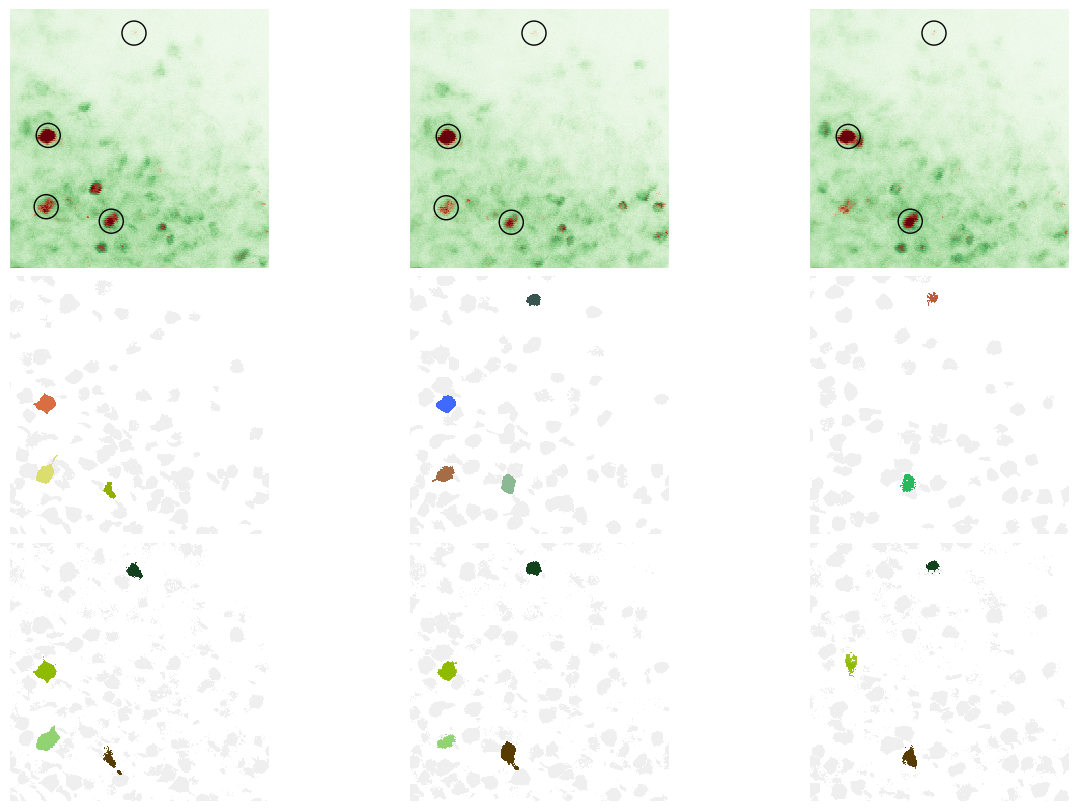

In [1674]:

crop = 150, 400, 20, 270
planes_plot = (3,4,5)
f,axs = plt.subplots(3,len(planes_plot),figsize=(12,8), layout='constrained')
bg_alpha = 0.125
for xx, plane_idx in enumerate(planes_plot):
    # f,ax = plt.subplots(figsize=(scale,scale))
    ax = axs[0][xx]
    red_lims = (0.8,2.0)
    red_mask = n.zeros_like(red_filt[plane_idx])
    red_mask[red_filt[plane_idx] > red_lims[0]] = (red_filt[plane_idx][red_filt[plane_idx] > red_lims[0]] - red_lims[0]) / n.diff(red_lims)
    red_mask[red_mask>1] = 1
    plot.show_img(green[plane_idx],ax=ax, cmap='Greens', alpha=1.0, vminmax=(0,4000))
    plot.show_img(red_filt[plane_idx],ax=ax, cmap='Reds', alpha=red_mask, vminmax=red_lims)
    centers = red_centers_best[:,0] == plane_idx
    ax.scatter(red_centers_best[centers][:,2],red_centers_best[centers][:,1],  color='none', s=300, edgecolor='k')
    ax.set_ylim(crop[1],crop[0])
    ax.set_xlim(crop[2],crop[3])
    ax.axis('off')
    

    ax = axs[1][xx]
    greencells = rgbvol_greencell_2p[plane_idx].copy()
    greencells[:,:,3] *= bg_alpha
    plot.show_img(greencells,ax=ax)
    plot.show_img(rgbvol_redcell_2p[plane_idx], ax = ax)
    ax.set_ylim(crop[1],crop[0])
    ax.set_xlim(crop[2],crop[3])
    ax.axis('off')
    
    
    ax = axs[2][xx]
    greencells = rgbvol_greencell_3d[plane_idx].copy()
    greencells[:,:,3] *= bg_alpha
    plot.show_img(greencells,ax=ax)
    plot.show_img(rgbvol_redcell_3d[plane_idx], ax = ax)
    ax.set_ylim(crop[1],crop[0])
    ax.set_xlim(crop[2],crop[3])
    ax.axis('off')

plt.savefig(fdir / 'three-rows.svg',dpi=300)

In [1672]:
for idx, center in enumerate(red_centers_best):
    print(red_centers_best[idx])
    print(roi_per_center_2p[idx])
    print(roi_per_center_3d[idx])

[  2 272  57   0]
1139
22
[  3 272  57   0]
1628
22
[  4 273  57   0]
2127
22
[  5 273  57   0]
None
22
[  6 274  57   0]
None
22
[  2 355 118   1]
None
24
[  3 355 118   1]
1763
263
[  4 356 118   1]
2071
263
[  5 355 117   1]
2710
263
[  6 356 118   1]
2795
263
[  2 341  55   2]
1165
82
[  3 341  55   2]
1679
82
[  4 342  55   2]
2177
82
[  2 173 140   7]
None
484
[  3 173 140   7]
None
484
[  4 173 140   7]
2235
484
[  5 173 140   7]
2772
484
[  6 173 140   7]
None
484


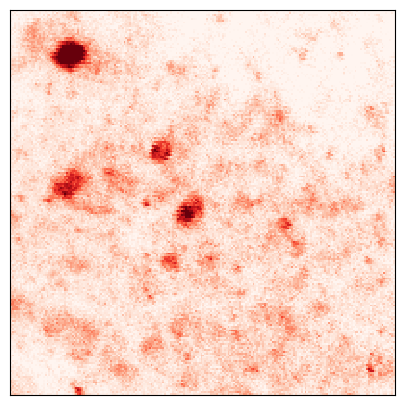

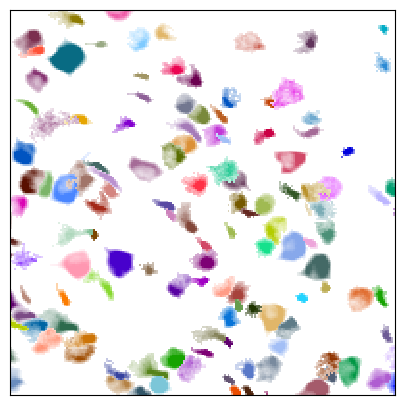

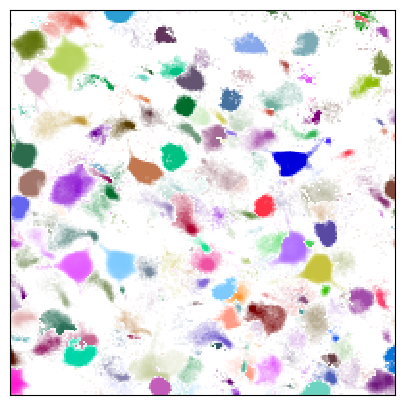

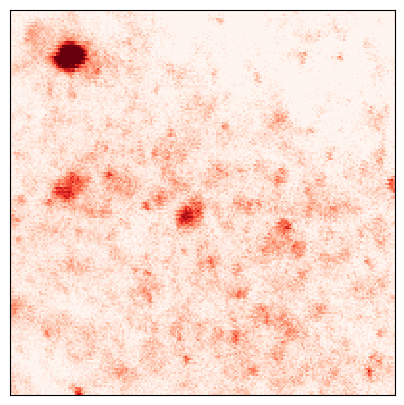

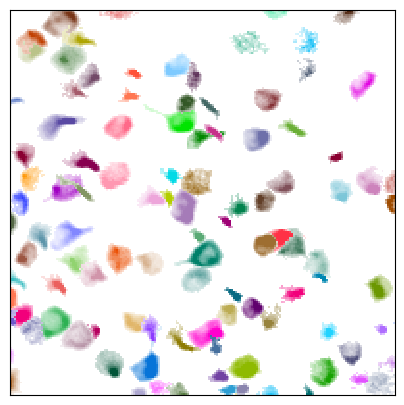

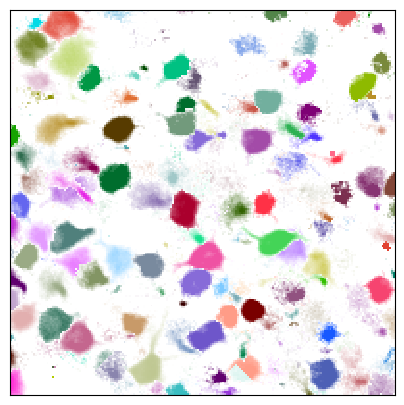

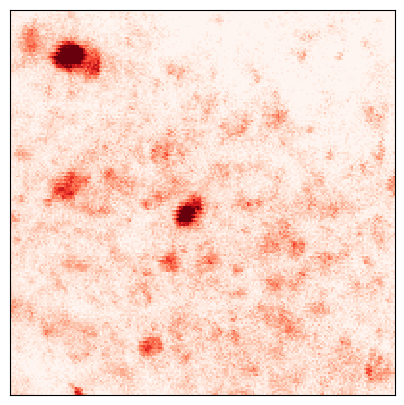

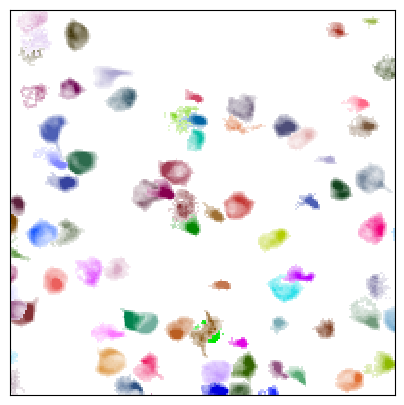

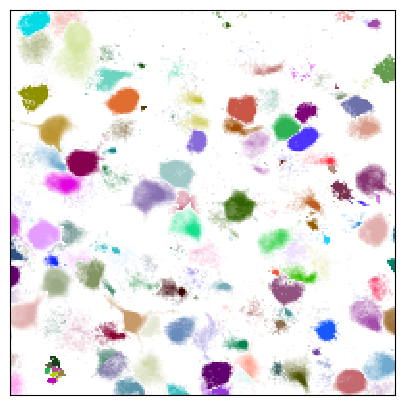

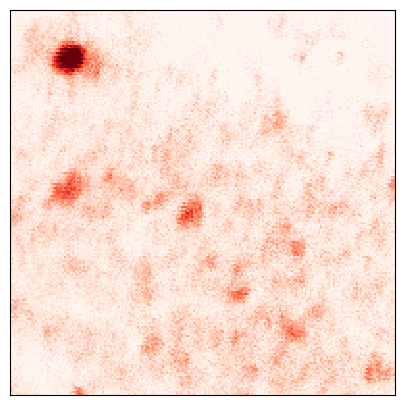

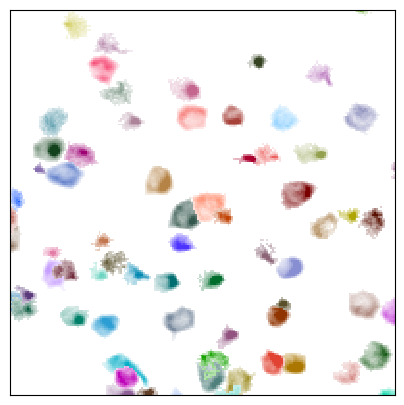

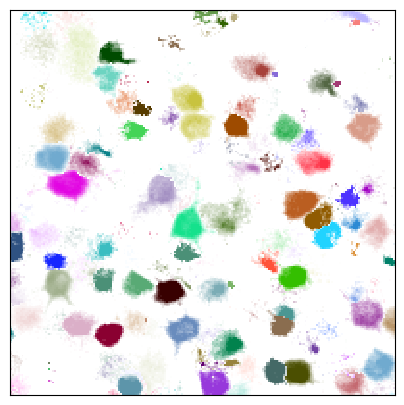

In [558]:
scale = 5
for i in (3,4,5, 6):
    f,ax = plt.subplots(figsize=(scale, scale))
    # plot.show_img(red[i][crop2p[0]:crop2p[1], crop2p[2]:crop2p[3]]**2, vminmax=(1000**2,5000**2), cbar=False, cmap='Reds',ax=ax)
    plot.show_img(red[i][crop2p[0]:crop2p[1], crop2p[2]:crop2p[3]], vminmax=(1000,5000), cbar=False, cmap='Reds',ax=ax)
    plt.show()
    f,ax = plt.subplots(figsize=(scale, scale))
    plot.show_img(rgbvol_2p[i][crop2p[0]:crop2p[1], crop2p[2]:crop2p[3]], ax=ax)
    
    plt.show()
    f,ax = plt.subplots(figsize=(scale, scale))
    plot.show_img(rgbvol_3d[i][crop2p[0]:crop2p[1], crop2p[2]:crop2p[3]], ax=ax)
    
    plt.show()

In [452]:
from suite3d.io import tiff_utils as tfu

In [454]:
tfu.save_mrc(fig_dir, 's2p_mrc.mrc', data = rgbvol_2p, voxel_size=(20,1.5,1.5))
tfu.save_mrc(fig_dir, 's3d_mrc.mrc', data = rgbvol_3d, voxel_size=(20,1.5,1.5))

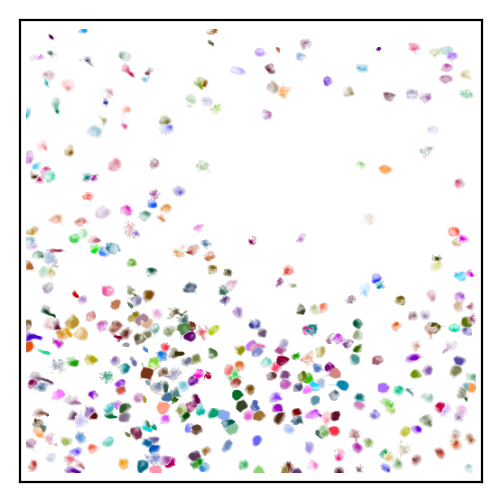

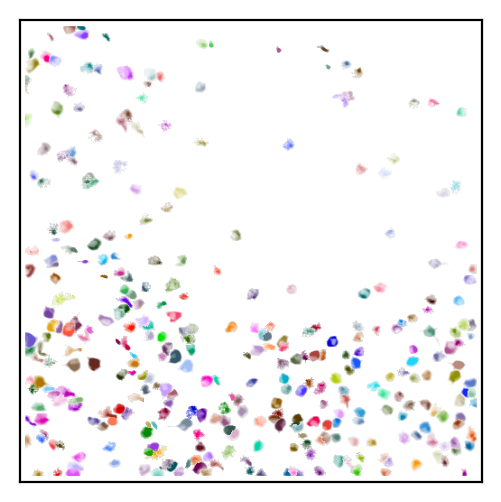

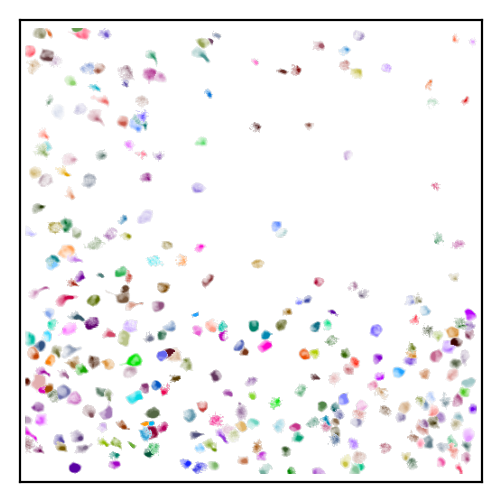

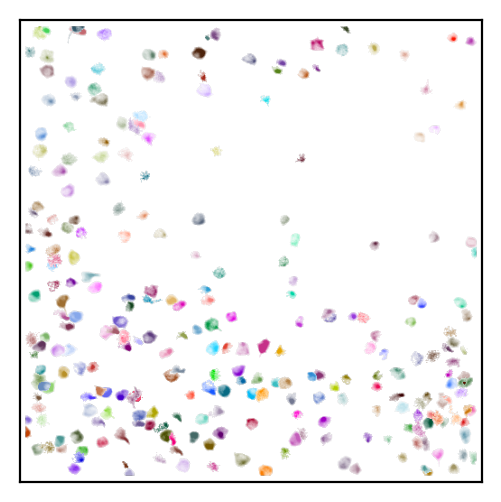

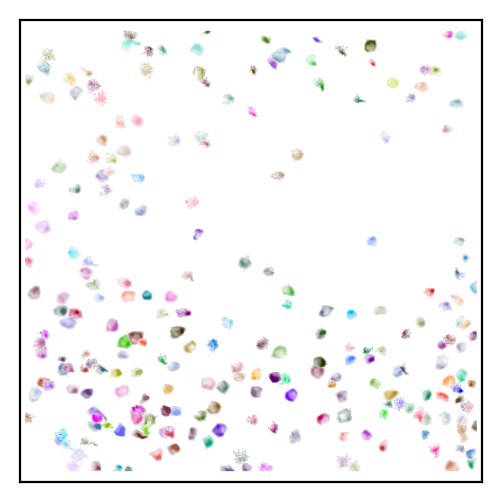

In [410]:
for i in (2,3,4,5,6):
    f,ax = plt.subplots(figsize=(3,3),dpi=200)
    plt.imshow(rgbvol_2p[i])
    ax.set_yticks([])
    ax.set_xticks([])
    

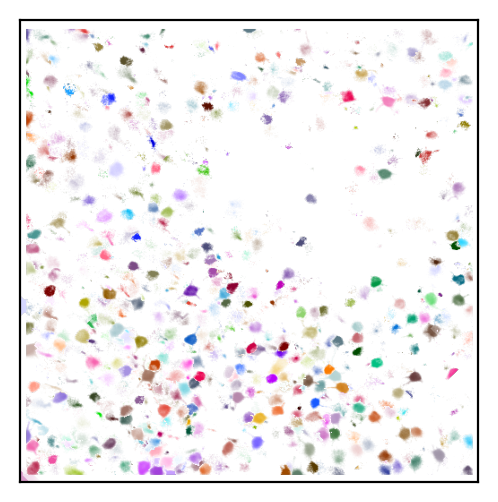

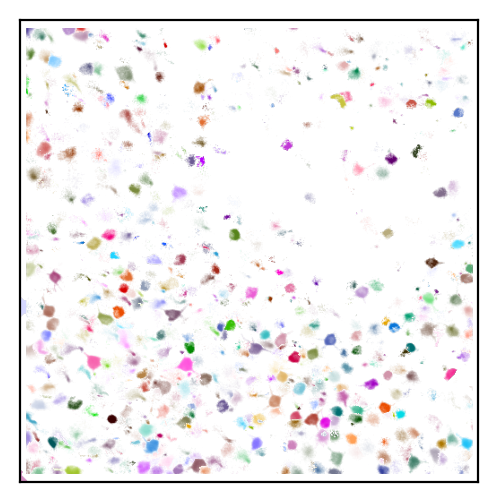

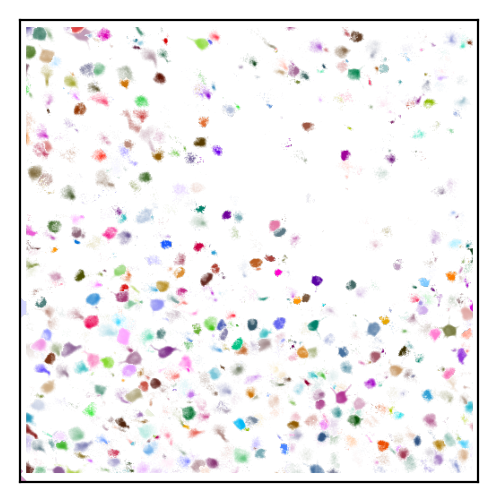

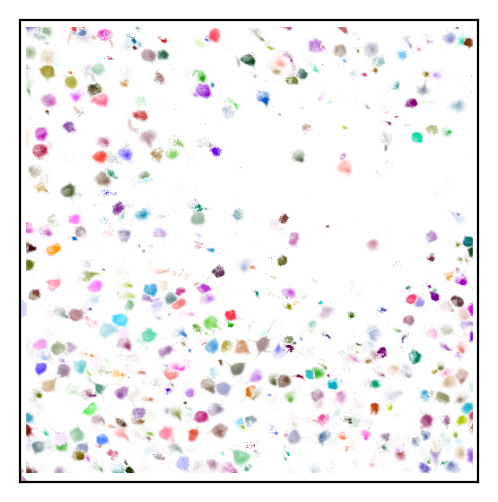

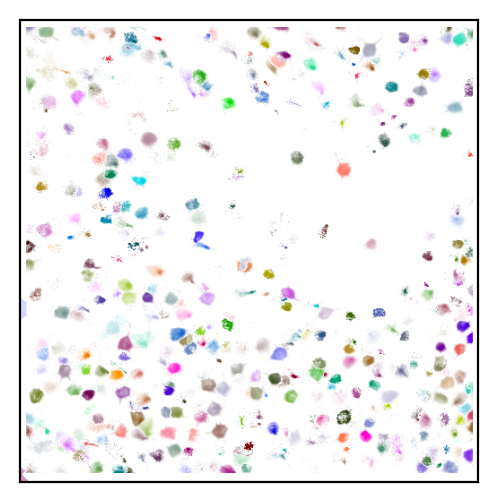

In [411]:
for i in (2,3,4,5,6):
    f,ax = plt.subplots(figsize=(3,3),dpi=200)
    plt.imshow(rgbvol_3d[i])
    ax.set_yticks([])
    ax.set_xticks([])
    

In [141]:
corr2p = n.corrcoef(spks2p)

In [146]:
corr2p_flat = corr2p[n.tril_indices(corr2p.shape[0], -1)]

(array([2.589432e+06, 6.195890e+05, 2.140200e+04, 2.237000e+03,
        4.970000e+02, 3.520000e+02, 3.550000e+02, 3.870000e+02,
        3.560000e+02, 8.900000e+01]),
 array([-0.07963728,  0.02432726,  0.1282918 ,  0.23225633,  0.33622087,
         0.44018541,  0.54414995,  0.64811449,  0.75207903,  0.85604357,
         0.9600081 ]),
 <BarContainer object of 10 artists>)

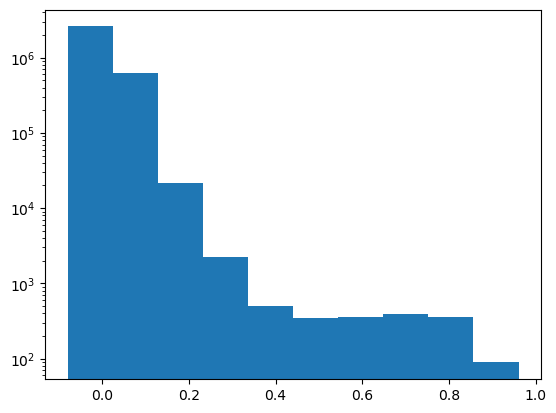

In [147]:
plt.hist(corr2p_flat,log=True)

In [489]:
split_and_make_mrcs(stats3d, fdir, 'mrc3d', shape = img3d.shape,lam_max = lam_max_3d, n_files=16)

/tmp/ipykernel_705365/3279566427.py:1: DeprecationWarning: Function save_mrc is deprecated. Only used in old demos
  split_and_make_mrcs(stats3d, fdir, 'mrc3d', shape = img3d.shape,lam_max = lam_max_3d, n_files=16)


In [490]:
split_and_make_mrcs(None, fdir, 'mrc2p', shape = img2p.shape, lam_max=lam_max_2p, coords=coords2p, lams=lams2p, n_files =16)

/tmp/ipykernel_705365/3046204669.py:1: DeprecationWarning: Function save_mrc is deprecated. Only used in old demos
  split_and_make_mrcs(None, fdir, 'mrc2p', shape = img2p.shape, lam_max=lam_max_2p, coords=coords2p, lams=lams2p, n_files =16)


In [484]:
def split_and_make_mrcs(stats, dir, name, n_files = 8, shape=None, lam_max = 1, cmap = 'cet_glasbey_dark', voxel_size=(1.5,1.5,20), coords=None, lams=None):
    if stats is None:
        nc = len(lams)
    else: nc = len(stats)
    cells = n.arange(nc)
    n.random.shuffle(cells)
    batchsize = nc // n_files
    for i in range(n_files):
        cx = cells[i*batchsize:(i+1)*batchsize]
        filefilt = n.zeros(nc, dtype=bool)
        filefilt[cx] = True
        __, filevol = ui.make_label_vols(stats, shape, lam_max=lam_max, cmap=cmap, iscell=filefilt, coords=coords,lams=lams)
        tfu.save_mrc(dir, name + f"{i:02d}of{n_files:02d}.mrc", filevol[:,:,:,-1], voxel_size = voxel_size)

In [142]:
n_files = 8
shuff_cells = n.where(filt)[0]
n.random.shuffle(shuff_cells)
nc = len(shuff_cells)
batchsize = nc // n_files
for i in range(n_files):
    cx = shuff_cells[i*batchsize:i*batchsize + batchsize]
    filefilt = n.zeros_like(filt)
    filefilt[cx] = True

    __, filevol = ui.make_label_vols(seg['stats'], corr_map.shape, lam_max=1.0, cmap='cet_glasbey_dark',
                                             iscell = filefilt)
    tfu.save_mrc(figname,os.path.join(fdir, f'landau_HC_{i:02d}.mrc'), filevol[:,:,:,-1],
            voxel_size=(1, 1, 15))

(2544, 2544)

In [471]:
fig_dir

PosixPath('/mnt/md0/s3d-figures')